**Öncelikle veri analiz için gerekli modül tanımlamalarını yaptım**

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Su kalite csv dosyası okuma işlemini gerçekleştirip dataframe oluşturdum**

In [2]:
df = pd.read_csv("/waterquality.csv")

**info() fonksiyonu ile dataframe ile ilgili temel verileri gözlemledim 7 farklı başlıkta 6 adet float tipi değişken 1 adet ise tarih object var Ve görüldüğü üzere veriler hep farklı sayılarda mevcut**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2366 non-null   object 
 1   Salinity (ppt)          2241 non-null   float64
 2   DissolvedOxygen (mg/L)  1520 non-null   float64
 3   pH                      2276 non-null   float64
 4   SecchiDepth (m)         2298 non-null   float64
 5   WaterDepth (m)          2300 non-null   float64
 6   WaterTemp (C)           2250 non-null   float64
 7   AirTemp (C)             2371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 148.3+ KB


**Describe fonksiyonu ile analiz öncesi temel değerleri inceledim**

In [4]:
df.describe()

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
count,2241.000,1520.000,2276.000,2298.000,2300.000,2250.000,2371.000
mean,0.717,6.646,7.168,0.525,0.763,18.062,15.663
std,1.231,2.507,0.788,0.474,0.621,8.298,10.315
min,0.000,0.000,0.300,0.000,0.010,0.000,-17.778
25%,0.000,4.800,6.500,0.300,0.400,11.000,8.889
50%,0.000,6.500,7.000,0.400,0.650,19.000,16.667
75%,1.000,8.500,7.500,0.650,0.950,25.000,23.889
max,9.000,15.100,9.900,9.000,12.000,74.000,33.500


**Boşluk kontrolü yaparak her sütun için toplam değer sayısını kontrol ettim AirTemp sütunundan da anladığım üzere maksimum değer sayısı 2371 adet Ama diğer tüm başlıklarda kayıp değerler mevcut**

In [5]:
df.isnull().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

**Aşağıda ki fonksiyon ile her bir başlık için toplam kayıp veri oranımızı hesapladım**

In [6]:
# Proportion of missing values by column
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), 100 * (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

# Apply the missing value method
null_dict = isnull_prop(df)

# Create a dataframe of the missing value information
df_kayip = pd.DataFrame.from_dict(null_dict,
                                    orient="index",
                                    columns=['Kayip', 'Kayip_orani'])
df_kayip

,Kayip,Kayip_orani
Date,5,0.211
Salinity (ppt),130,5.483
DissolvedOxygen (mg/L),851,35.892
pH,95,4.007
SecchiDepth (m),73,3.079
WaterDepth (m),71,2.995
WaterTemp (C),121,5.103
AirTemp (C),0,0.000


**Analiz için pH değerini seçtim Çünkü suyun pH seviyesi hem insan sağlığı için önemli bir parametre hem de veri kayıp oranı sadece % 4 gözüküyor Analiz öncesi mevcut pH verilerine grafikte gösterdim**

Mean pH degeri 7.168211775043937
 Median pH degeri 7.0
 Min pH degeri 0.3
 Max pH degeri 9.9


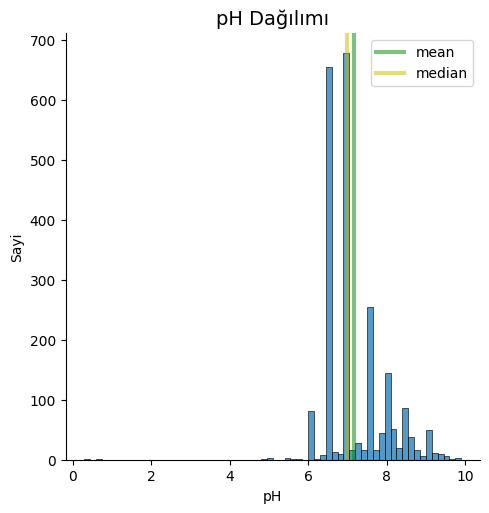

In [7]:
# set the histogram, mean and median
sns.displot(df["pH"], kde=False)
plt.axvline(x=df.pH.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.pH.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("pH")
plt.ylabel("Sayi")
plt.title("pH Dağılımı", size=14)
plt.legend(["mean", "median"]);

print(f'Mean pH degeri {df.pH.mean()}\n Median pH degeri {df.pH.median()}\n Min pH degeri {df.pH.min()}\n Max pH degeri {df.pH.max()}')

**Grafikte de görüldüğü üzere minimum 0.3 maksimum ise 9.9 gözüküyor Verilerin ağırlıklı dağılımı ise 6 ve 9 değerleri arasında Aşağıda ise pH verilerine bir ön izleme yaptım**

In [8]:
df["pH"]

0      7.500
1      7.500
2      8.000
3      8.000
4      8.500
        ... 
2366   7.000
2367     NaN
2368   6.500
2369   7.000
2370     NaN
Name: pH, Length: 2371, dtype: float64

**Veri önizlemesinde de görüldüğü üzere NaN değerleri mevcut Bu değerleri sıfır ile değiştirdim Daha sonra ise analizden çıkarıcam**

In [9]:
df["test"] = df["pH"].fillna(0)
df["pH"] = df["test"]
df["pH"]

0      7.500
1      7.500
2      8.000
3      8.000
4      8.500
        ... 
2366   7.000
2367   0.000
2368   6.500
2369   7.000
2370   0.000
Name: pH, Length: 2371, dtype: float64

**İnsan sağlığı açısından uygun pH değeri 6.5 ile 8.5 arasında kabul ediliyor Bu aralıkta yer alan pH değerlerini döngü içerisinde saydırıp saglikli_deger olarak hesapladım Sonra ise toplam değerlere olan oranını hesapladım Ph ölçümüne ait 2371 veriden 1306 tanesi insan sağlığı için uygun değerde iken kalan 1065 adet veri ise uygun değil**

1306
1065


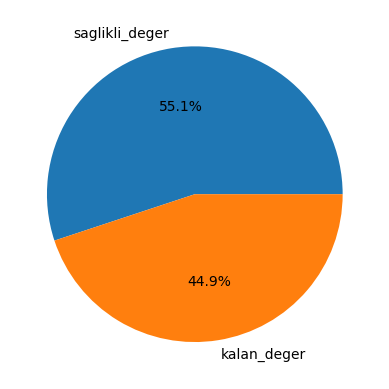

In [10]:
saglikli_deger = 0

for deger in df["pH"]:
  if 6.5 < deger < 8.5:
    saglikli_deger = saglikli_deger + 1

kalan_deger = len(df["pH"]) - saglikli_deger

print(saglikli_deger)

print(kalan_deger)

x = np.array([saglikli_deger, kalan_deger])

etiketler = ["saglikli_deger","kalan_deger"]

plt.pie(x, labels = etiketler, autopct='%1.1f%%')

plt.show()



**Yukarıda ki grafikten de anlaşılacağı üzere pH değerlerinin % 55 i insan sağlığı için uygun gözüküyor ama pH analizini daha sağlıklı hale getirmek için toplam pH verileri içerisinde outlier ve noise temizliği yapmam lazım**

In [11]:
# Herhangi bir sütundaki verinin outlier olması için alt ve üst limiti
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df,"test")

(5.0, 9.0)

**Hesaplanan threshold değerlerini görüldüğü üzere minimum 5 maksimum 9 olarak kullanabiliriz Bu değerlerin dışına taşan değerleri ise analizden çıkartıyorum Aşağıda ki fonsiyonda ise 5 ile 9 aralığında ki toplam değer sayısını hesapladım Elimde 2371 adet pH verisi vardı yapılan noise temizliği ile bu sayı 2188 e düştü**

In [12]:
uygun_deger = 0

for sayac in df["pH"]:
  if 5 < sayac < 9:
    uygun_deger = uygun_deger + 1

print(uygun_deger)

2188


**Artık pH analizi için elimde daha sağlıklı bir veri seti var Bu verileri daha anlaşılır bir şekilde grafiğe dönüştürdüm İnsan sağlığı için uygun pH değer sayısını 1306 olarak hesaplamıştım Analiz yapmaya uygun olan veri sayısı ise 2188 olarak hesaplandı Bu verileri kullanarak saglikli_deger ve sagliksiz_deger grafik analizini aşağıda yaptım**

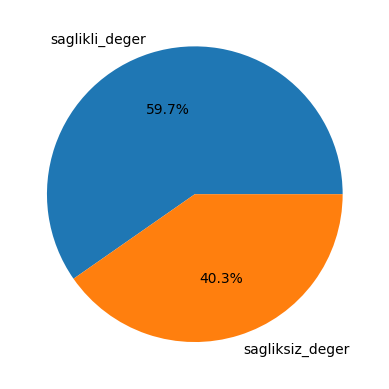

In [13]:
sagliksiz_deger = uygun_deger - saglikli_deger

y = np.array([saglikli_deger, sagliksiz_deger])

etiketler = ["saglikli_deger","sagliksiz_deger"]

plt.pie(y, labels = etiketler, autopct='%1.1f%%')

plt.show()



**Grafikte de görüldüğü üzere outlier ve noise veri temizliği yapılması sayesinde sağlığa uygun pH değer oranı % 55 ten % 60 a kadar yükselmiştir**

**Şimdi ise pH ile hava sıcaklığı (AirTemp) arasında bir ilişki var mı yok mu ona bakıyorum Grafikte de anlaşılacağı üzere pH 6-9 değerleri hava sıcaklığı 5-30 C arasında yoğun olarak gerçekleşmiş**

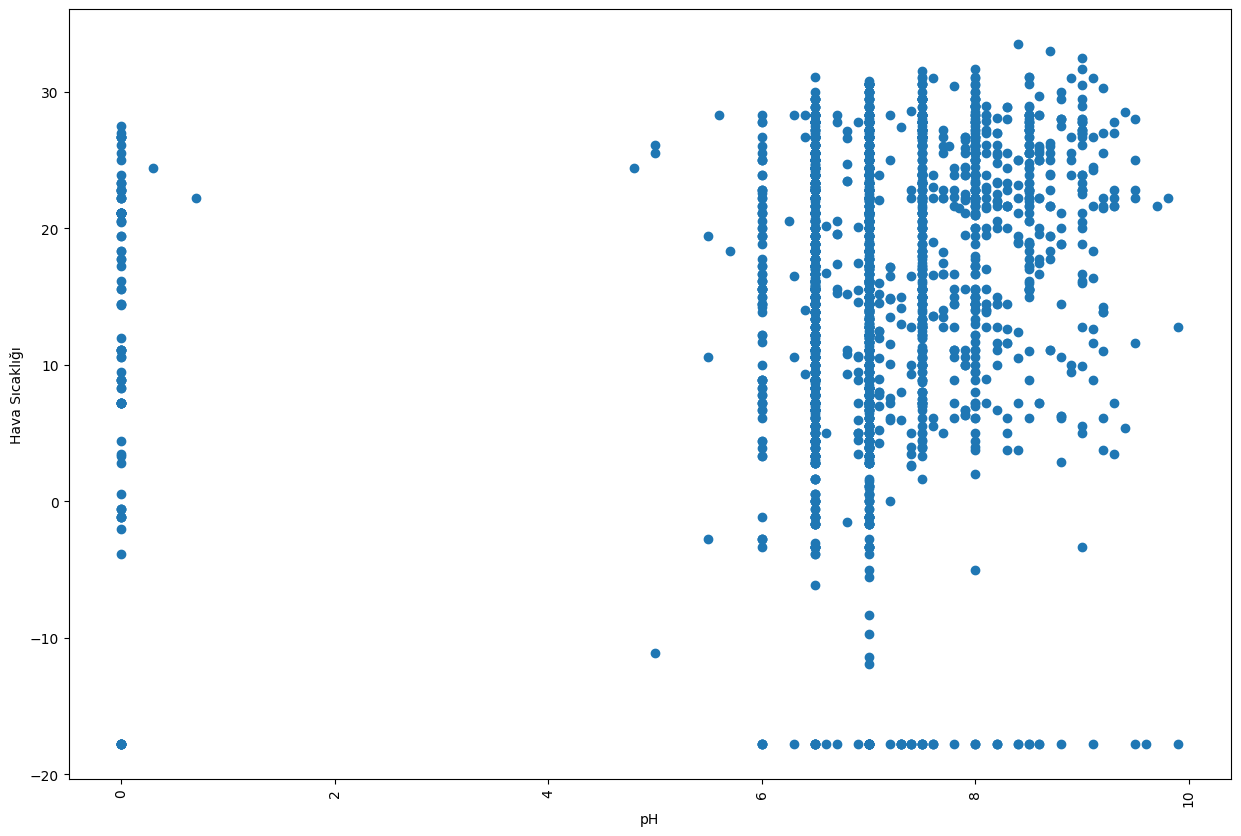

In [14]:
plt.figure(figsize=(15,10))
plt.scatter('pH',"AirTemp (C)" , data=df)
plt.xticks(rotation=90)
plt.xlabel('pH')
plt.ylabel('Hava Sıcaklığı')
plt.show()

**Daha sonra veriler arası korelasyon ilişkisini görselleştirdim Grafikten de anlaşılacağı üzere "SecchiDepth" ile "WaterDepth" arasında ve "AirTemp" ile "WaterTemp" arasında 1'e yakın yakınlık vardır Ki mantıksal olarakta bu şekilde çıkması lazım Böylelikle hesaplama başarılıdır diyebilirim**

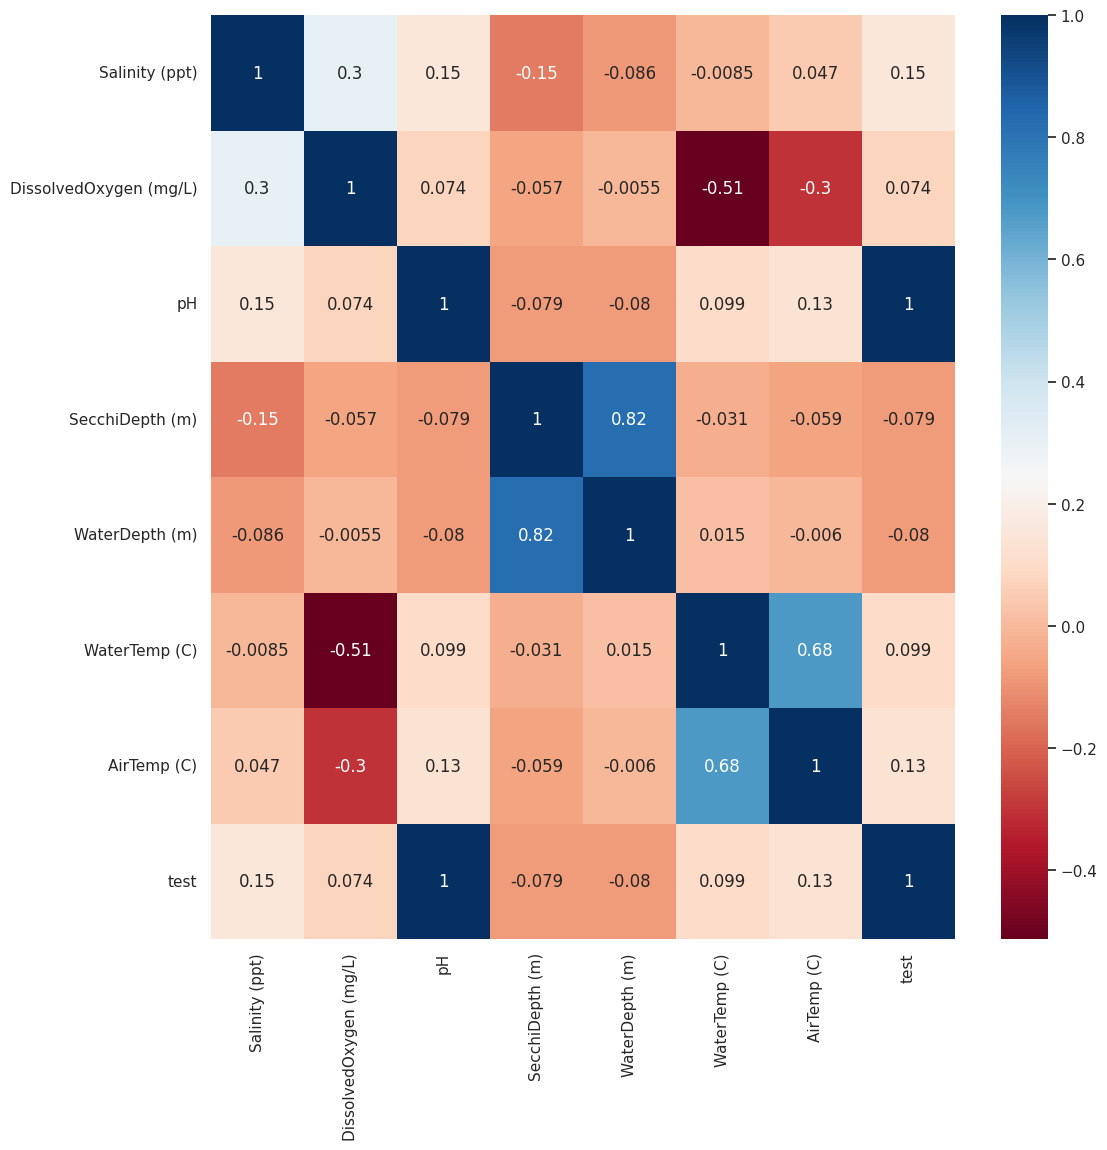

In [15]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

**Son olaraksa her veri için histogram grafiklerini oluşturdum**

(array([9.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 8.000e+00,
        7.840e+02, 1.036e+03, 3.630e+02, 8.200e+01]),
 array([0.  , 0.99, 1.98, 2.97, 3.96, 4.95, 5.94, 6.93, 7.92, 8.91, 9.9 ]),
 <BarContainer object of 10 artists>)

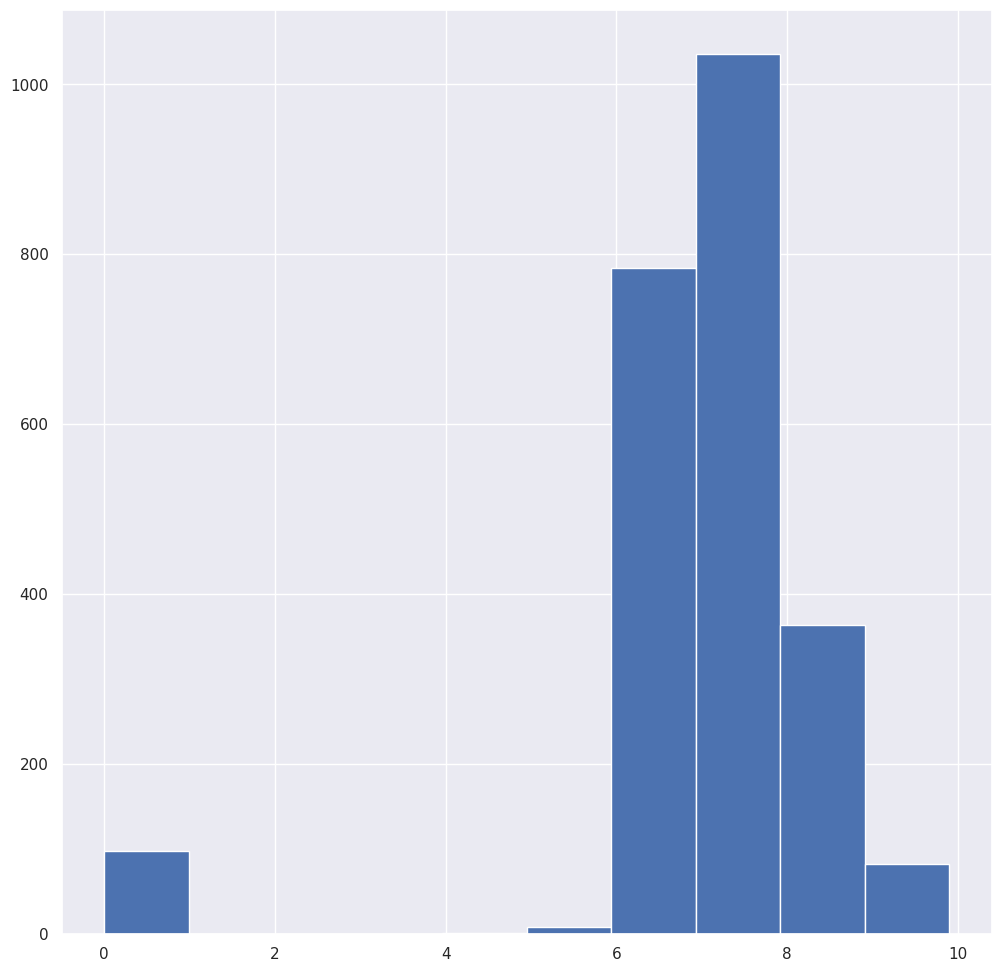

In [19]:
plt.hist(df['pH'])

#pH grafiği için 6-9 aralığı analiz için sağlıklı gözüküyor

(array([1507.,  336.,  147.,  153.,   65.,   26.,    3.,    0.,    2.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

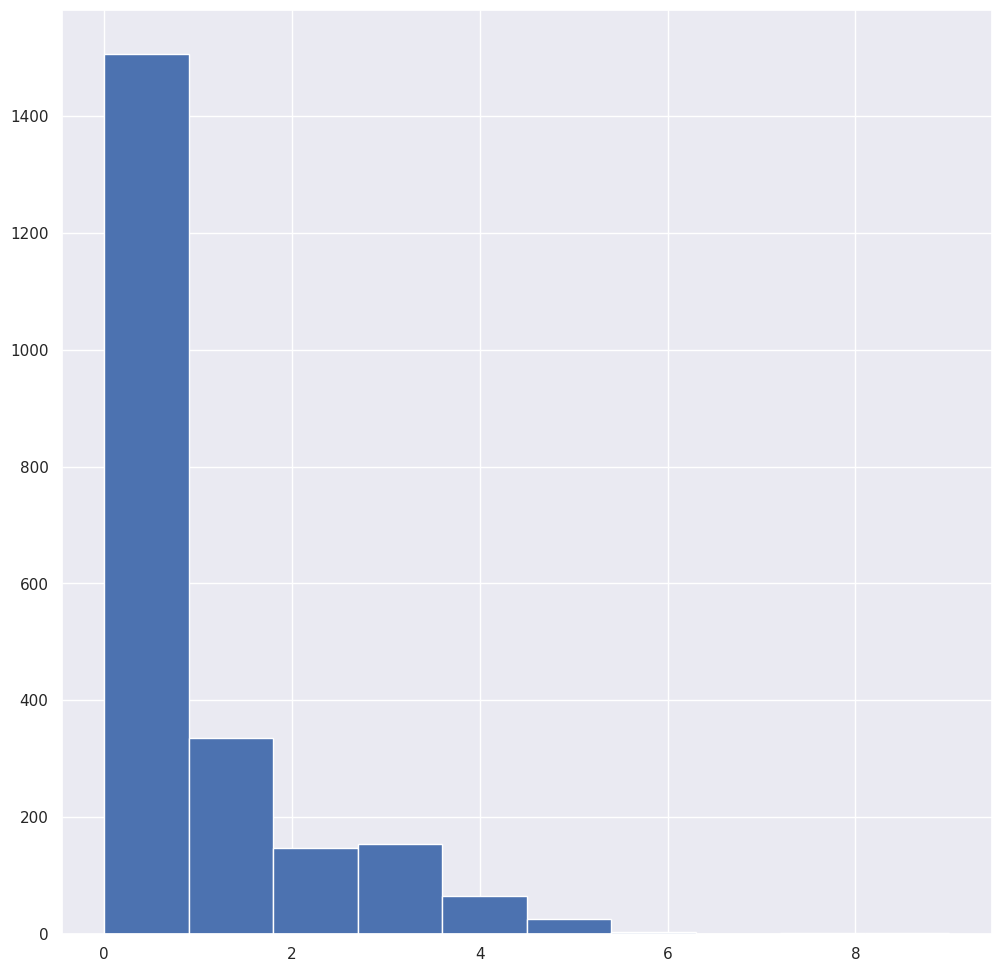

In [20]:
plt.hist(df['Salinity (ppt)'])

#Salinity (ppt) değeri için 0-2 aralığı sağlıklı görünüyor

(array([ 14.,  84., 253., 304., 311., 277., 180.,  75.,  18.,   4.]),
 array([ 0.  ,  1.51,  3.02,  4.53,  6.04,  7.55,  9.06, 10.57, 12.08,
        13.59, 15.1 ]),
 <BarContainer object of 10 artists>)

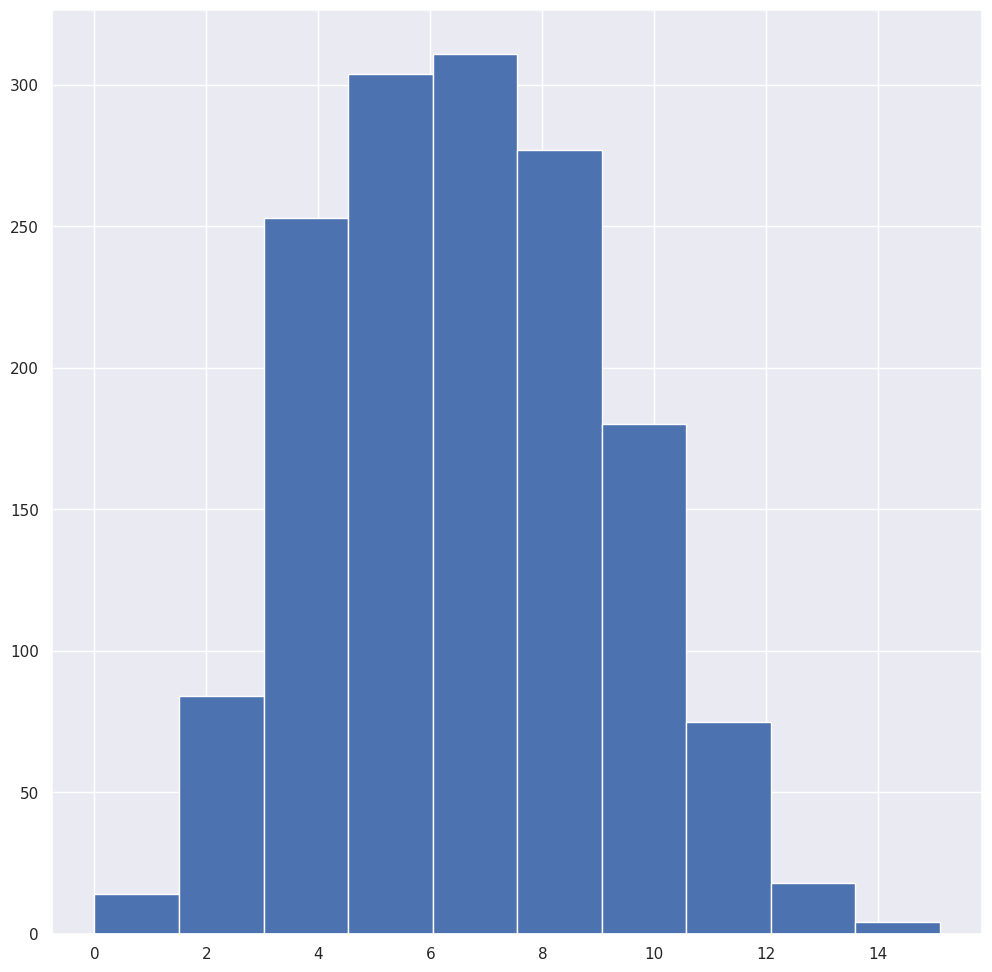

In [21]:
plt.hist(df['DissolvedOxygen (mg/L)'])

#DissolvedOxygen (mg/L) değeri için 3-11 aralığı sağlıklı görünüyor

(array([1.995e+03, 2.800e+02, 1.100e+01, 2.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

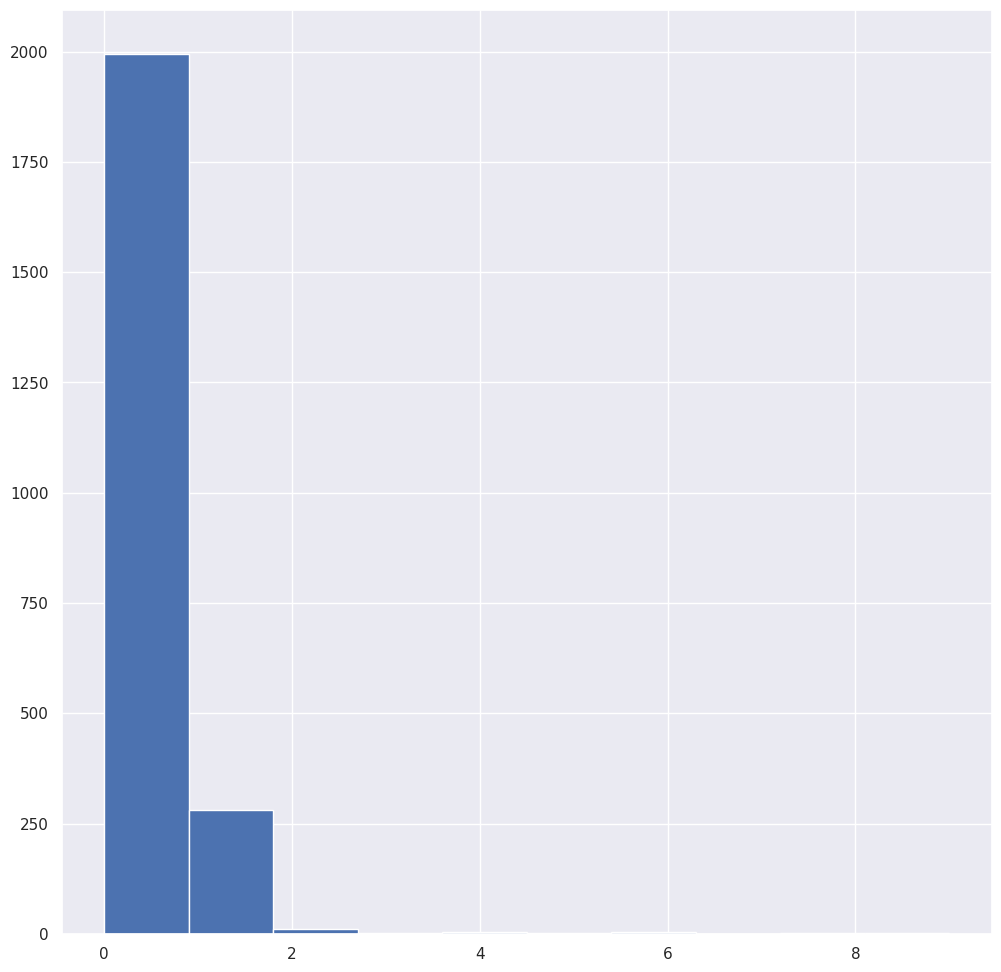

In [23]:
plt.hist(df['SecchiDepth (m)'])

#SecchiDepth (m) değeri için 0-2 aralığı sağlıklı gözüküyor

(array([1.932e+03, 3.450e+02, 1.100e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e-02, 1.2090e+00, 2.4080e+00, 3.6070e+00, 4.8060e+00,
        6.0050e+00, 7.2040e+00, 8.4030e+00, 9.6020e+00, 1.0801e+01,
        1.2000e+01]),
 <BarContainer object of 10 artists>)

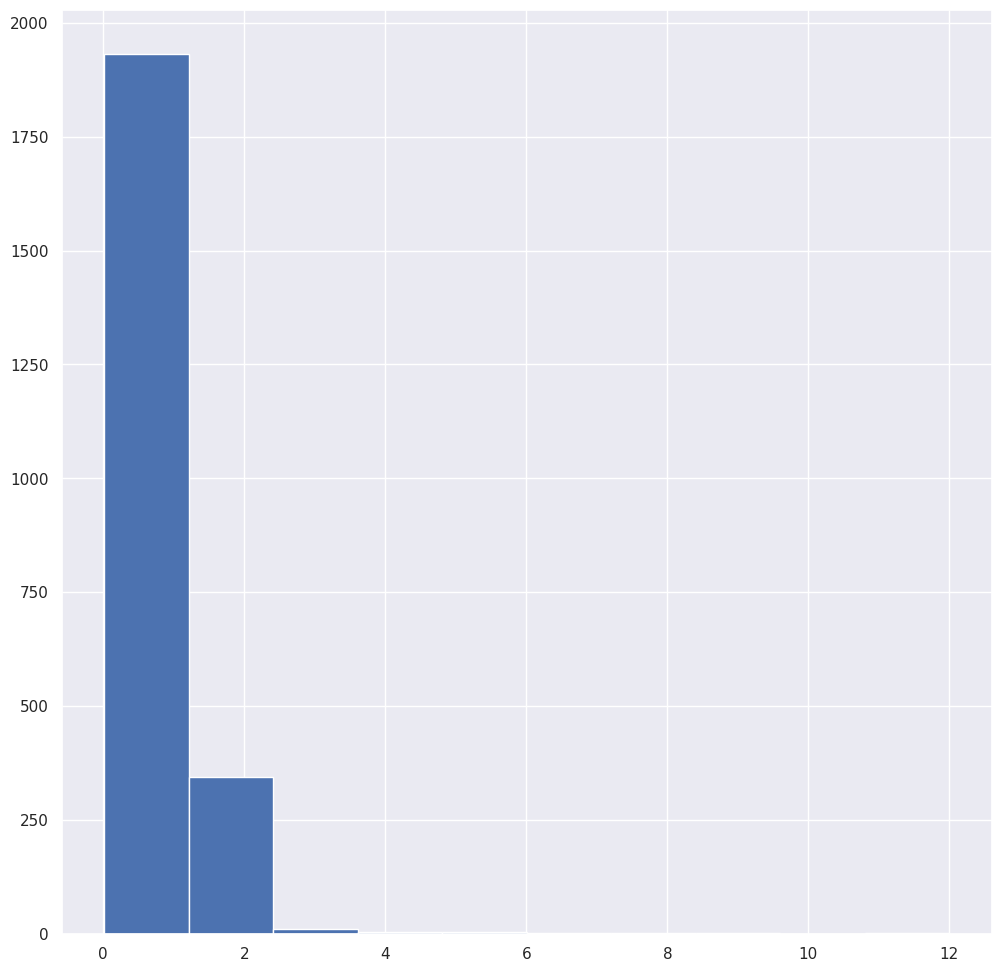

In [24]:
plt.hist(df['WaterDepth (m)'])

#WaterDepth (m) değeri için 0-2 aralığı sağlıklı gözüküyor

(array([261., 593., 567., 730.,  92.,   2.,   1.,   2.,   1.,   1.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <BarContainer object of 10 artists>)

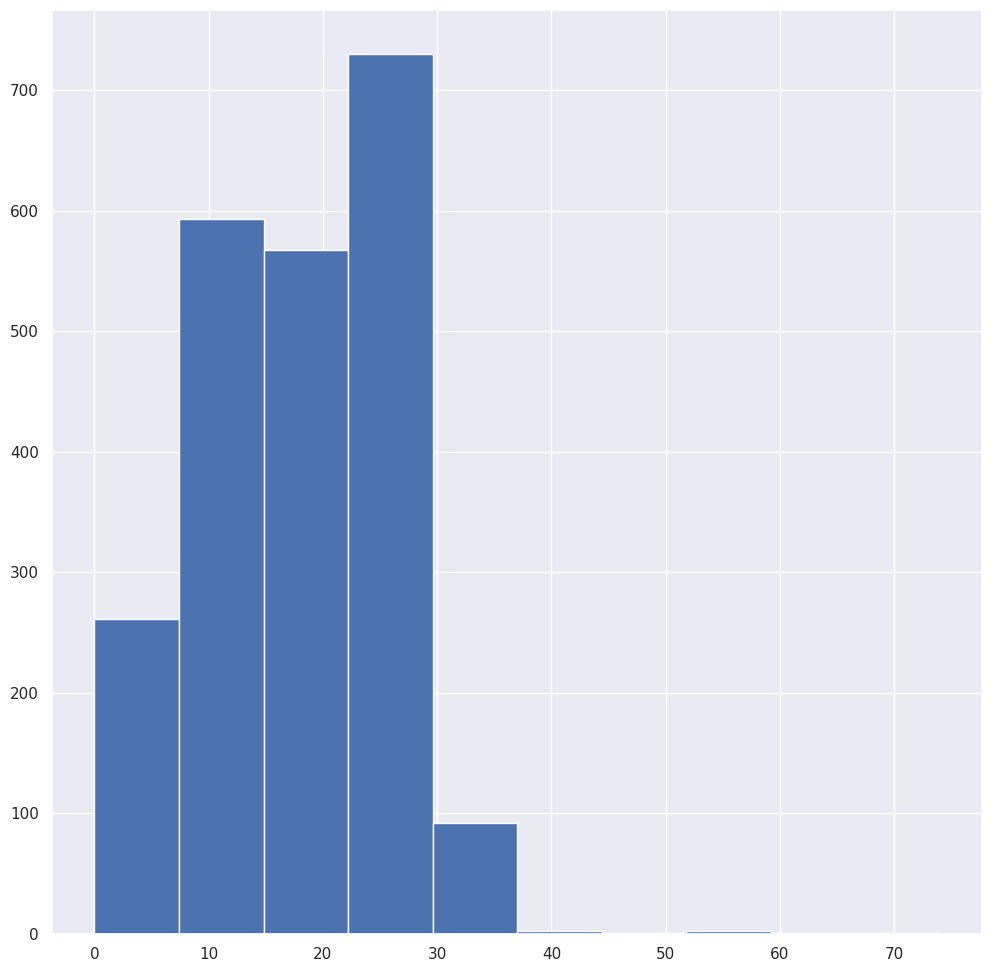

In [25]:
plt.hist(df['WaterTemp (C)'])

#WaterTemp (C) değeri için 0-30 aralığı sağlıklı gözüküyor

(array([ 71.,   5.,  29.,  74., 320., 374., 391., 445., 562., 100.]),
 array([-17.77777778, -12.65      ,  -7.52222222,  -2.39444445,
          2.73333333,   7.86111111,  12.98888889,  18.11666667,
         23.24444444,  28.37222222,  33.5       ]),
 <BarContainer object of 10 artists>)

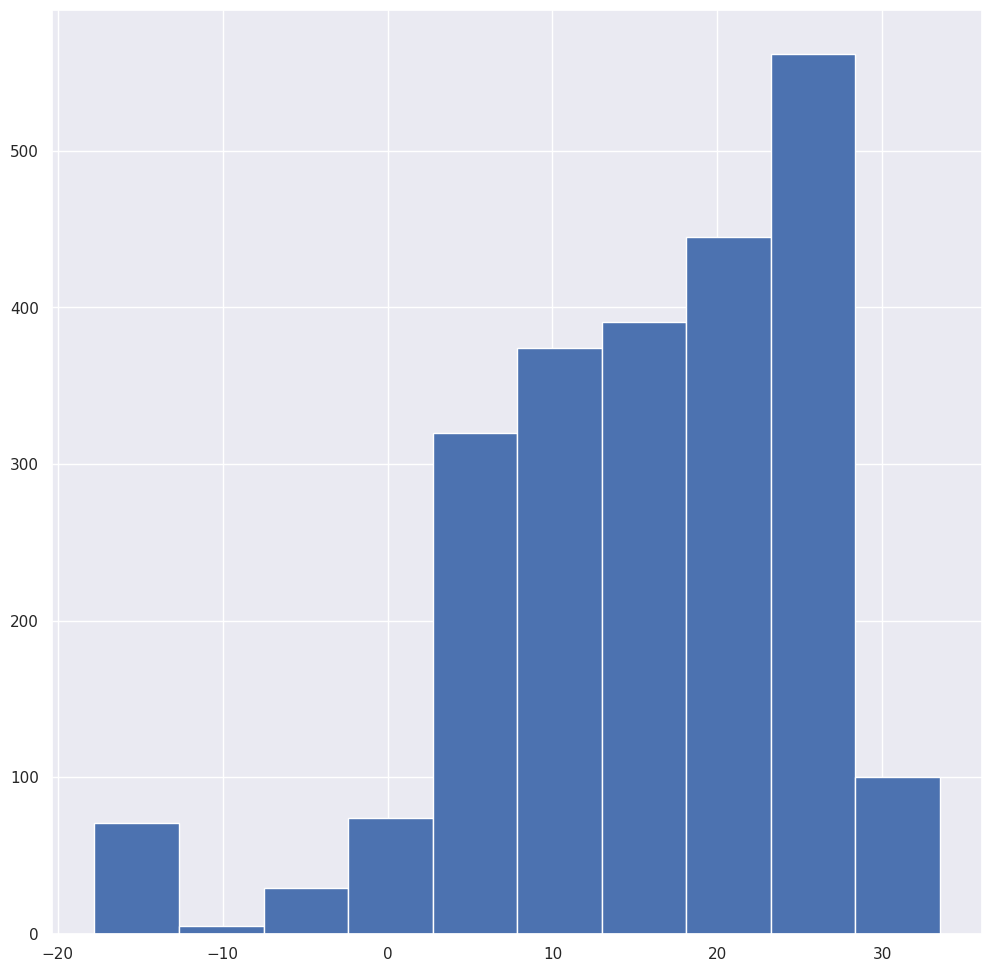

In [26]:
plt.hist(df['AirTemp (C)'])

# AirTemp (C) değeri için 5-35 aralığı sağlıklı gözüküyor